In [19]:
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

from mne import Epochs,find_events

from eegnb import generate_save_path
from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.analysis.utils import load_data,plot_conditions,load_csv_as_raw
from eegnb.datasets import fetch_dataset
from eegnb.devices.utils import EEG_INDICES, SAMPLE_FREQS

In [78]:
board_name = 'muse2'
device_name = board_name
experiment = 'auditory_oddball'
subject = 1
session_nb = 2

#ch_ind = EEG_INDICES[device_name]
#sfreq = SAMPLE_FREQS[device_name]

# Create save file name
save_fn = generate_save_fn(board_name, experiment, subject, session_nb)
print(save_fn)


eegnb_data_path = generate_save_path(board_name, experiment, subject, session_nb)



raw = load_data(subject, session_nb, device_name, experiment, replace_ch_names=None, verbose=1, site='all', data_dir=None)
      

#raw = load_data(subject,session_nb,
#                experiment=experiment, device_name=board_name,
#                data_dir = eegnb_data_path)

C:\Users\surya/.eegnb\data\auditory_oddball\local\muse2\subject0001\session002\recording_2020-11-10-22.56.58.csv
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  1049.480 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=268668
    Range : 0 ... 268667 =      0.000 ...  104

Effective window size : 8.000 (s)


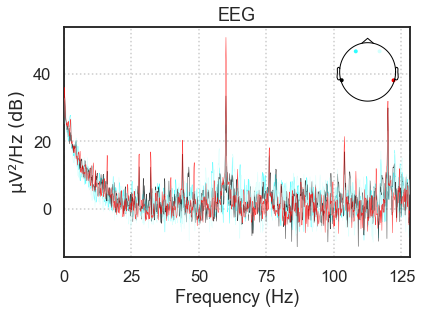

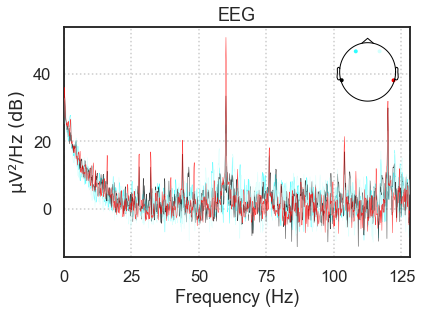

In [79]:
raw.plot_psd()

Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 268668

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


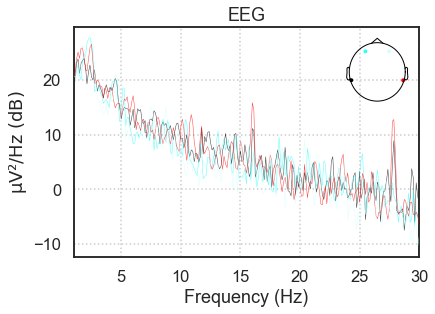

In [80]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

In [81]:
from mne import merge_events
events = find_events(raw)

9003 events found
Event IDs: [    99 111113 111131 111133 111313 111331 111333 113313 113331 113333
 133313 133322 133332 133333 222222 222233 222422 222423 222433 224422
 224423 224433 244413 244422 244423 244432 244433 333313 333322 333323
 333331 333332 333333 444413 444422 444423 444433]


In [82]:
def permute_events(indexOfInterest):
    low = []
    high = []
    neither = []
    for i in range(444444):
        if len(str(i)) >= indexOfInterest + 1:
            if int(str(i)[indexOfInterest]) == 1 and i >= pow(10, 5 - indexOfInterest) :
                low.append(i)
            elif int(str(i)[indexOfInterest]) == 2 and i >= pow(10, 5 - indexOfInterest) :
                high.append(i)
            elif int(str(i)[indexOfInterest]) == 3 and i >= pow(10, 5 - indexOfInterest) :
                neither.append(i)
            elif int(str(i)[indexOfInterest]) == 4 and i >= pow(10, 5 - indexOfInterest) :
                neither.append(i)
    return low, high, neither




In [83]:
low0, high0, neither0 = permute_events(0)
low1, high1, neither1 = permute_events(1)
low2, high2, neither2 = permute_events(2)
low3, high3, neither3 = permute_events(3)
lllowPe, lllhighPe, llneither = permute_events(4)
hllowPe, hlhighPe, hlneither = permute_events(5)

sample drop %:  15.617016550038876


<Epochs  |   7597 events (all good), -0.101562 - 0.800781 sec, baseline off, ~53.8 MB, data loaded,
 'Deviant': 1170
 'Neither': 2197
 'Standard': 4230>

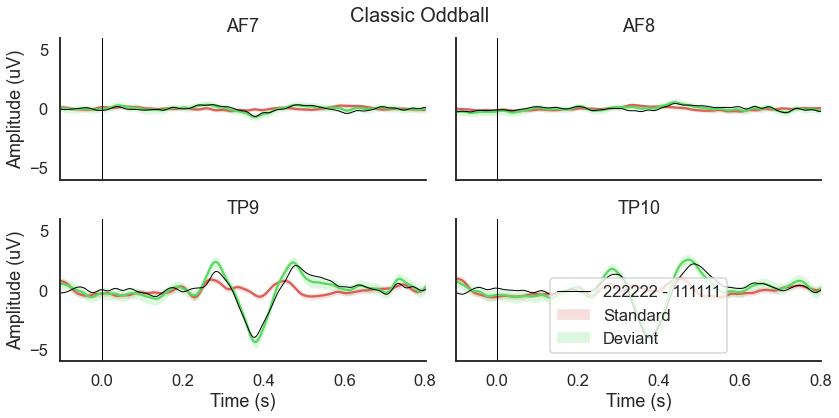

In [84]:
#0 index
cevents = merge_events(events, low0, 111111)
cevents = merge_events(cevents, high0, 222222)
cevents = merge_events(cevents, neither0, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

sample drop %:  15.617016550038876


<Epochs  |   7597 events (all good), -0.101562 - 0.800781 sec, baseline off, ~53.8 MB, data loaded,
 'Deviant': 824
 'Neither': 3375
 'Standard': 3398>

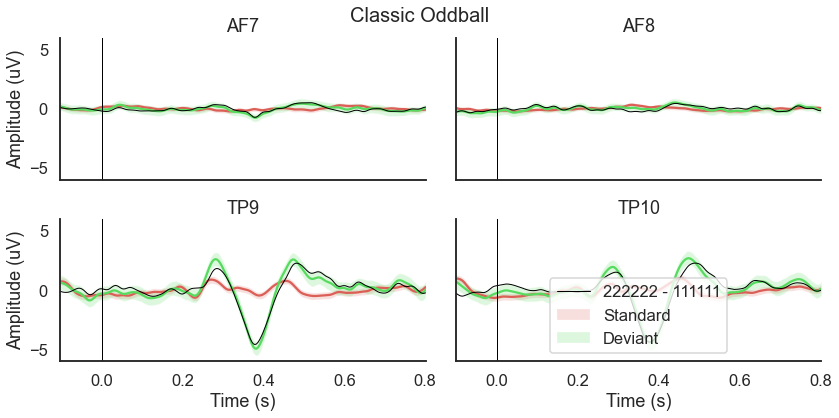

In [85]:
#1 index
cevents = merge_events(events, low1, 111111)
cevents = merge_events(cevents, high1, 222222)
cevents = merge_events(cevents, neither1, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

sample drop %:  15.617016550038876


<Epochs  |   7597 events (all good), -0.101562 - 0.800781 sec, baseline off, ~53.8 MB, data loaded,
 'Deviant': 645
 'Neither': 4209
 'Standard': 2743>

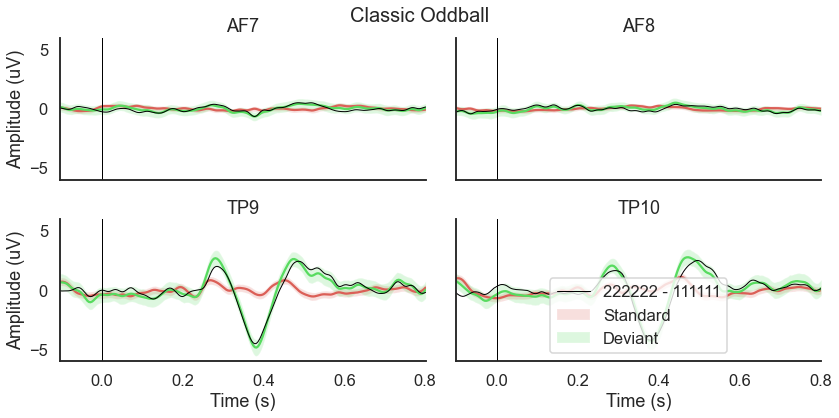

In [86]:
#2 index
cevents = merge_events(events, low2, 111111)
cevents = merge_events(cevents, high2, 222222)
cevents = merge_events(cevents, neither2, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

sample drop %:  15.617016550038876


<Epochs  |   7597 events (all good), -0.101562 - 0.800781 sec, baseline off, ~53.8 MB, data loaded,
 'Deviant': 505
 'Neither': 4861
 'Standard': 2231>

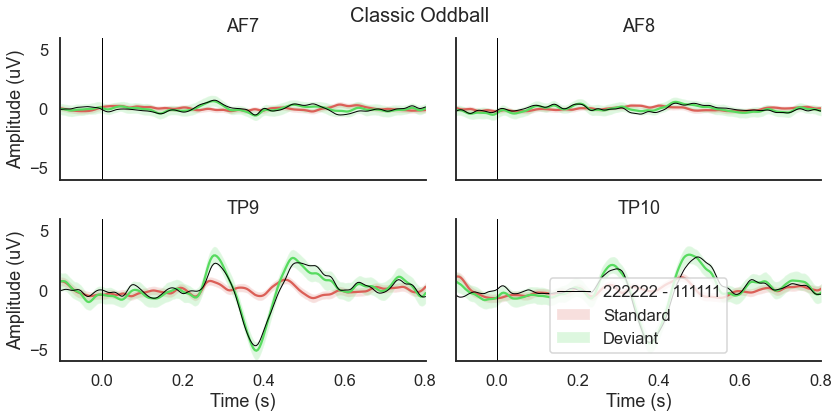

In [87]:
#3 index
cevents = merge_events(events, low3, 111111)
cevents = merge_events(cevents, high3, 222222)
cevents = merge_events(cevents, neither3, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

sample drop %:  15.617016550038876


<Epochs  |   7597 events (all good), -0.101562 - 0.800781 sec, baseline off, ~53.8 MB, data loaded,
 'Deviant': 1131
 'Neither': 5367
 'Standard': 1099>

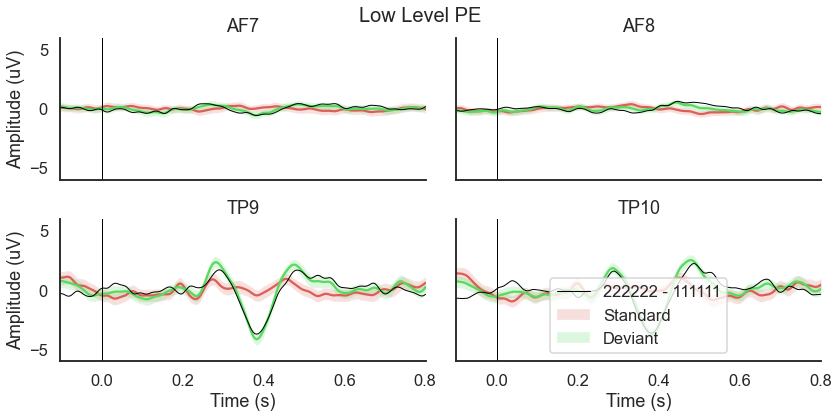

In [88]:
#4 index, low level PE
cevents = merge_events(events, lllowPe, 111111)
cevents = merge_events(cevents, lllhighPe, 222222)
cevents = merge_events(cevents, llneither, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Low Level PE',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

sample drop %:  15.617016550038876


<Epochs  |   7597 events (all good), -0.101562 - 0.800781 sec, baseline off, ~53.8 MB, data loaded,
 'Deviant': 1129
 'Neither': 5302
 'Standard': 1166>

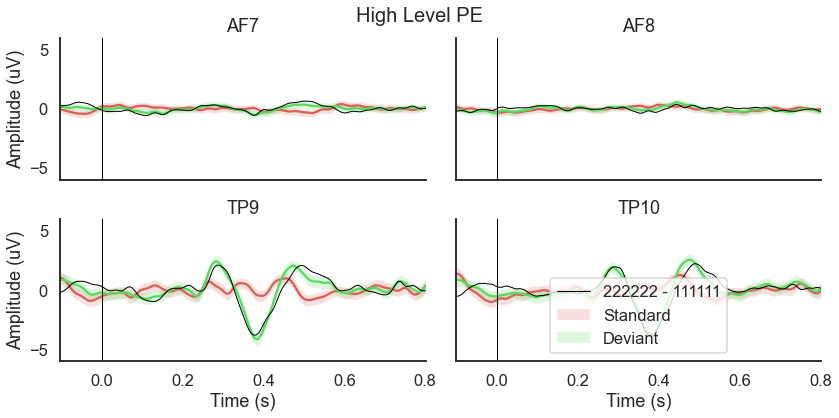

In [89]:
#5 index, high level PE
cevents = merge_events(events, hllowPe, 111111)
cevents = merge_events(cevents, hlhighPe, 222222)
cevents = merge_events(cevents, hlneither, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='High Level PE',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

sample drop %:  36.92858907832963


<Epochs  |   5105 events (all good), -0.101562 - 0.800781 sec, baseline off, ~36.2 MB, data loaded,
 'Deviant': 3402
 'Standard': 1703>

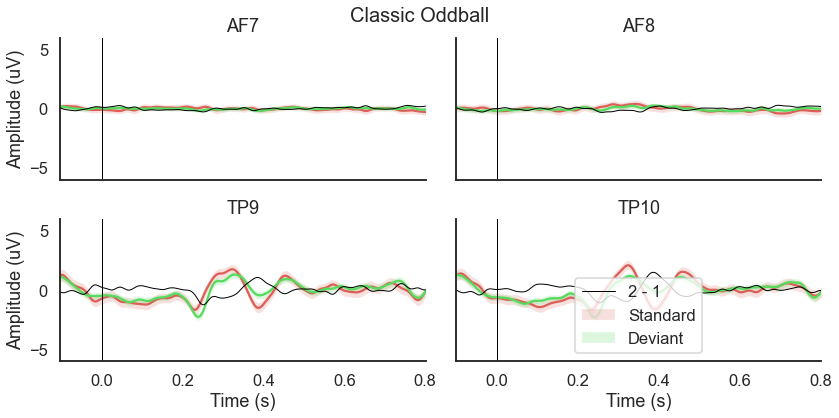

In [101]:
cevents = merge_events(events, [1, 2, 10, 20, 22], 1)
cevents = merge_events(cevents, [100, 101, 102, 110, 120, 122], 2)
event_id = {'Standard': 1, 'Deviant': 2}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [1]
conditions['Deviant'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(1, 2))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

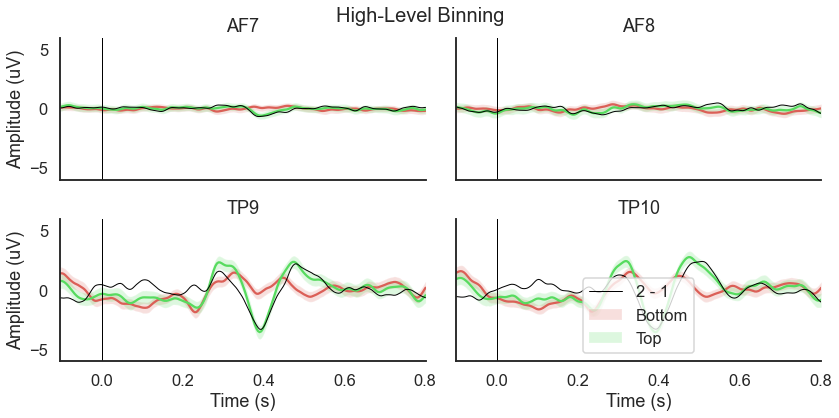

In [98]:
hevents = merge_events(events, [10, 110], 1)
hevents = merge_events(hevents, [20, 22, 120, 122], 2)
event_id = {'Bottom': 1, 'Top': 2}

epochs = Epochs(raw, events=hevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Bottom'] = [1]
conditions['Top'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='High-Level Binning',
                          diff_waveform=(1, 2))
print('sample drop %: ', (1 - len(epochs.events)/len(hevents)) * 100)
epochs

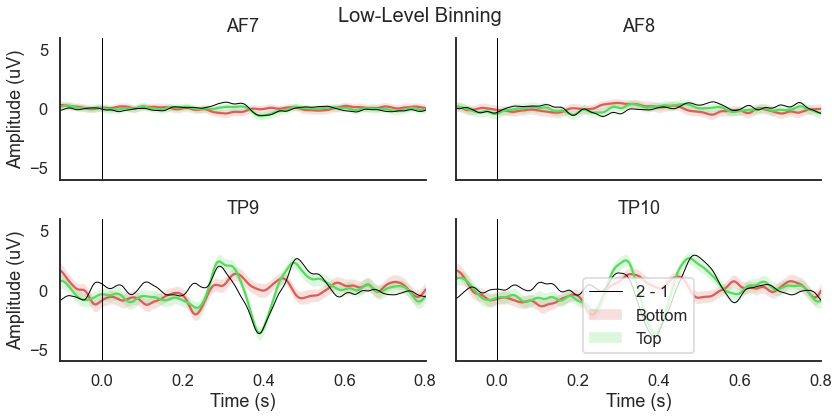

In [99]:
levents = merge_events(events, [1, 101], 1)
levents = merge_events(levents, [2, 22, 102, 122], 2)
event_id = {'Bottom': 1, 'Top': 2}

epochs = Epochs(raw, events=levents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Bottom'] = [1]
conditions['Top'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Low-Level Binning',
                          diff_waveform=(1, 2))
print('sample drop %: ', (1 - len(epochs.events)/len(levents)) * 100)
epochs